In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parse_output(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        # Validation:
        val_loss = [float(line.split("val_MAE:")[-1].split("- val_MAE(E):")[0]) for line in lines if "val_MAE" in line]
        val_mae_energies = [float(line.split("- val_MAE(E):")[-1].split("- val_MAE(F):")[0]) for line in lines if "val_MAE" in line]
        val_mae_forces = [float(line.split("- val_MAE(F):")[-1].split("- val_MAE(S):")[0]) for line in lines if "val_MAE" in line]
        val_mae_stresses = [float(line.split("- val_MAE(S):")[-1]) for line in lines if "val_MAE" in line]
        # Train MAE:
        train_mae_energies = [float(line.split("- MAE(E):")[-1].split("- MAE(F):")[0]) for line in lines if "val_MAE" in line]
        train_mae_forces = [float(line.split("- MAE(F):")[-1].split("- MAE(S):")[0]) for line in lines if "val_MAE" in line]
        train_mae_stresses = [float(line.split("- MAE(S):")[-1].split("- val_MAE:")[0]) for line in lines if "val_MAE" in line]
    return {
        "val_loss": val_loss,
        "val_mae_energies": val_mae_energies,
        "val_mae_forces": val_mae_forces,
        "val_mae_stresses": val_mae_stresses,
        "train_mae_energies": train_mae_energies,
        "train_mae_forces": train_mae_forces,
        "train_mae_stresses": train_mae_stresses,
    }
    
# Separate energy, force and stress in subplots

def plot(
    output_dict: dict
):
    val_loss = output_dict["val_loss"]
    val_mae_energies = output_dict["val_mae_energies"]
    val_mae_forces = output_dict["val_mae_forces"]
    val_mae_stresses = output_dict["val_mae_stresses"]
    train_mae_energies = output_dict["train_mae_energies"]
    train_mae_forces = output_dict["train_mae_forces"]
    train_mae_stresses = output_dict["train_mae_stresses"]
    # Last 20 epochs to see if converged
    fig, ax = plt.subplots(1, 3, figsize=(20, 4.5), sharex=True, sharey=False)

    i=0
    ax[0].plot(
        np.array(train_mae_energies[i:]) * 1000, linestyle='-', marker='o', markersize=5
    )
    ax[0].plot(
        np.array(val_mae_energies[i:])* 1000, linestyle='-', marker='o', markersize=5
    )

    ax[1].plot(
        np.array(train_mae_forces[i:]) * 1000, linestyle='-', marker='o', markersize=5
    )
    ax[1].plot(
        np.array(val_mae_forces[i:])* 1000, linestyle='-', marker='o', markersize=5
    )
    ax[2].plot(
        np.array(train_mae_stresses[i:]), label="Training", linestyle='-', marker='o', markersize=5
    )
    ax[2].plot(
        np.array(val_mae_stresses[i:]), label="Validation", linestyle='-', marker='o', markersize=5
    )
    ax[1].set_xlabel("Epochs")

    ax[0].set_ylabel("Energy MAE (meV/atom)")
    ax[1].set_ylabel("Force MAE (meV/$\\AA$)")
    ax[2].set_ylabel("Stress MAE (GPa)")

    ax[0].set_title("Energy")
    ax[1].set_title("Force")
    ax[2].set_title("Stress")

    # for i in range(3):
    #     ax[i].legend(frameon=True, fontsize=14)
    fig.legend(frameon=True, fontsize=14, )#loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.2))

    # Add text with best errors, put text in rectangle for visibility

    j = np.argmin(val_loss)
    bbox = {"edgecolor": '#E9A66C', 'facecolor': '#E9A66C', 'alpha': 0.6, 'pad': 5}
    ax[0].text(0.65, 0.9, "{:.1f} meV/atom".format(val_mae_energies[j]*1000), transform=ax[0].transAxes, bbox=bbox, zorder=10)
    ax[1].text(0.65, 0.9, "{:.1f} meV/$\\AA$".format(val_mae_forces[j]*1000), transform=ax[1].transAxes, bbox=bbox, zorder=10)
    ax[2].text(0.75, 0.9, "{:.3f} GPa".format(val_mae_stresses[j]), transform=ax[2].transAxes, bbox=bbox, zorder=10)

    # Add space between subtitle and plot
    fig.subplots_adjust(top=0.85)

    fig.savefig("./maes_separated_by_field.svg", dpi=300, bbox_inches="tight")
    # return fig

def count_ele(dic):
    count = 0
    for key,value in dic.items():
        for i in value:
            count += 1
    return print(f'the num of ele in the dic is {count/7}')

In [4]:
output_dic = parse_output('output')
count_ele(output_dic)
print (output_dic)
# first five element are 
for key,value in output_dic.items():
    output_dic[key] = value[-80:]
print(output_dic)
count_ele(output_dic)

the num of ele in the dic is 165.0
{'val_loss': [0.2204, 0.2383, 0.2014, 0.1899, 0.1927, 0.1959, 0.1896, 0.1827, 0.1898, 0.155, 0.1584, 0.174, 0.1635, 0.1385, 0.1518, 0.144, 0.1379, 0.1357, 0.1838, 0.156, 0.1425, 0.1405, 0.1323, 0.1311, 0.1303, 0.1519, 0.1217, 0.1718, 0.141, 0.1611, 0.1623, 0.1265, 0.1259, 0.118, 0.1432, 0.1467, 0.1227, 0.1361, 0.1131, 0.1222, 0.1164, 0.1087, 0.1419, 0.1248, 0.1238, 0.1236, 0.114, 0.1299, 0.1281, 0.1083, 0.1124, 0.1169, 0.1157, 0.1273, 0.1175, 0.119, 0.1338, 0.1072, 0.1301, 0.1356, 0.1377, 0.1359, 0.1018, 0.1054, 0.1007, 0.1121, 0.1151, 0.1258, 0.1117, 0.1275, 0.1042, 0.1097, 0.1255, 0.0984, 0.1112, 0.1025, 0.147, 0.1038, 0.1307, 0.0993, 0.0958, 0.1226, 0.0975, 0.1331, 0.1116, 0.1263, 0.1229, 0.1185, 0.122, 0.1071, 0.1157, 0.107, 0.1034, 0.0996, 0.1014, 0.1016, 0.1082, 0.0958, 0.0951, 0.0972, 0.0926, 0.0916, 0.0914, 0.0919, 0.0911, 0.0984, 0.0868, 0.0903, 0.1056, 0.0875, 0.083, 0.088, 0.0831, 0.086, 0.0825, 0.087, 0.0805, 0.0842, 0.081, 0.0858, 0.0876,

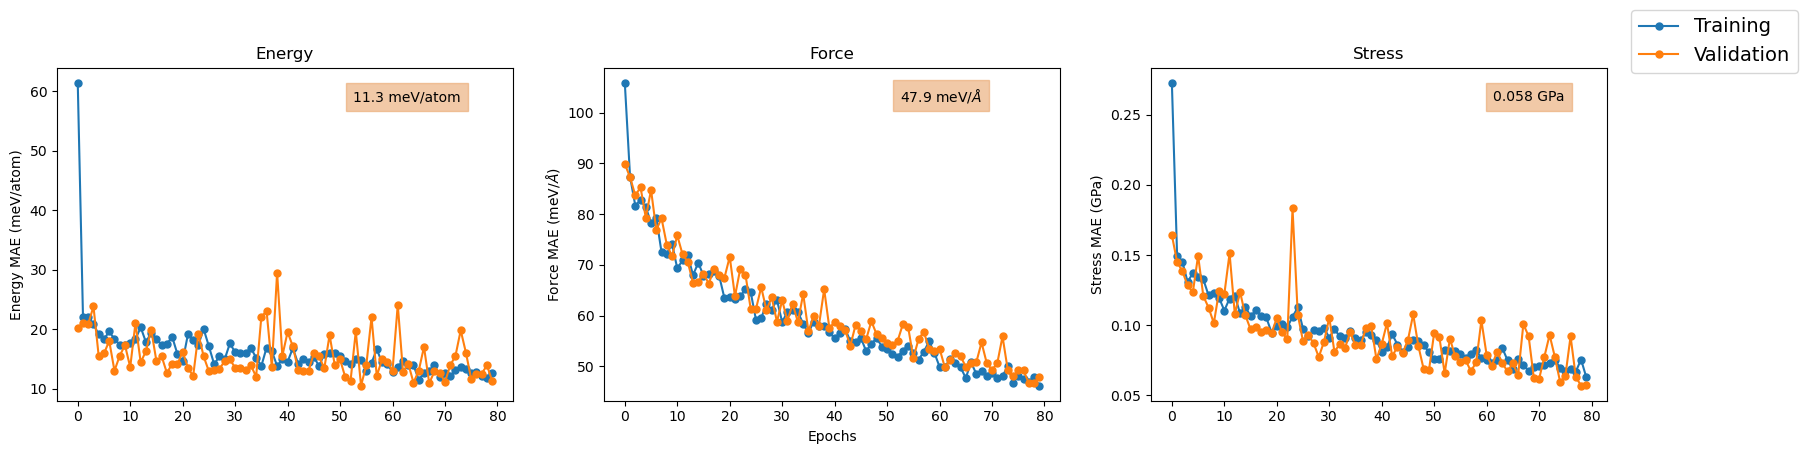

In [5]:
plot(output_dic)

In [6]:
# data = pd.read_excel('m3gnet_2023_11_21_14_54_50_epochs.xlsx')
# data